In hoeverre is het mogelijk om logische clusters te vinden o.b.v. onder andere budget en omzet? Denk aan blockbusters (hoog budget en hoge omzet), flops (hoog budget en lage omzet) of cultfilms (laag budget en hoge omzet).

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

In [34]:
bestand = "movie-1-cleaned.csv"
df = pd.read_csv(bestand, encoding='utf-8')

# Toon instellingen om alles zichtbaar te maken
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 2000)
pd.set_option('display.max_colwidth', None)

print("Aantal films in dataset:", len(df))
df.head()

Aantal films in dataset: 3881


,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000
1,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pirate|singapore,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,0
2,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000
3,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police officer|terrorist plot,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000
4,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|princess,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000


Aantal ontbrekende waarden per kolom:
 facenumber_in_poster         6
duration                     1
num_critic_for_reviews       1
director_name                0
imdb_score                   0
actor_2_facebook_likes       0
title_year                   0
budget                       0
content_rating               0
country                      0
language                     0
num_user_for_reviews         0
plot_keywords                0
cast_total_facebook_likes    0
actor_3_name                 0
num_voted_users              0
movie_title                  0
actor_1_name                 0
genres                       0
gross                        0
actor_1_facebook_likes       0
actor_2_name                 0
actor_3_facebook_likes       0
director_facebook_likes      0
movie_facebook_likes         0
dtype: int64

Basis statistieken voor budget en omzet:
             budget         gross
count  3.881000e+03  3.881000e+03
mean   4.527954e+07  5.116045e+07
std    2.226587e+08  6.985214

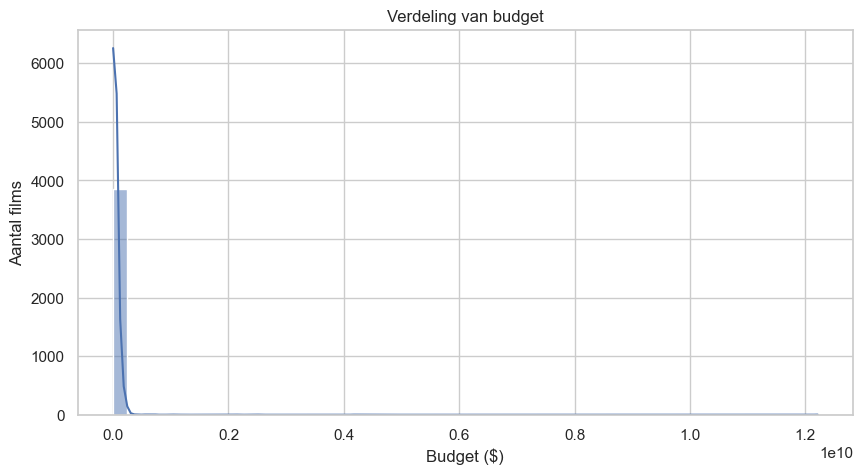

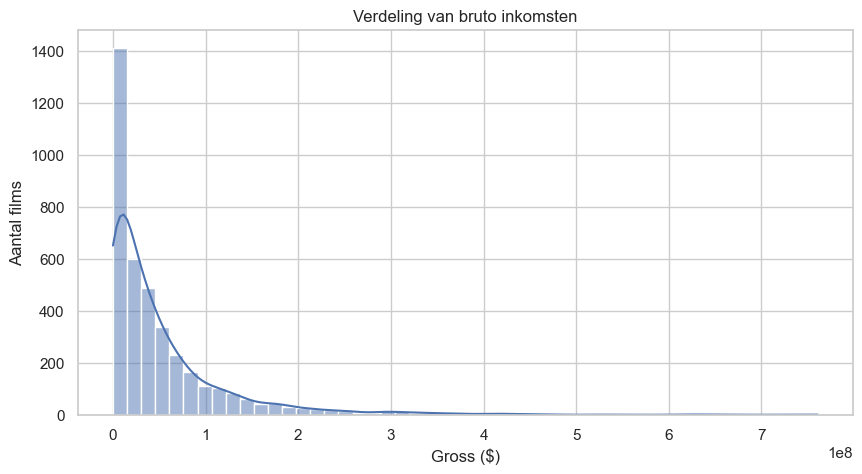

In [35]:
# Controleer hoeveel NaN waarden er zijn per kolom
missing = df.isna().sum().sort_values(ascending=False)
print("Aantal ontbrekende waarden per kolom:\n", missing)

# Basis statistieken voor budget en gross
print("\nBasis statistieken voor budget en omzet:")
print(df[['budget', 'gross']].describe())

# Histogram van budget
plt.figure(figsize=(10,5))
sns.histplot(df['budget'].dropna(), bins=50, kde=True)
plt.title("Verdeling van budget")
plt.xlabel("Budget ($)")
plt.ylabel("Aantal films")
plt.show()

# Histogram van gross
plt.figure(figsize=(10,5))
sns.histplot(df['gross'].dropna(), bins=50, kde=True)
plt.title("Verdeling van bruto inkomsten")
plt.xlabel("Gross ($)")
plt.ylabel("Aantal films")
plt.show()

In [36]:
# Alleen films met budget en gross
df_fin = df.dropna(subset=['budget', 'gross']).copy()

# Schaal features voor KMeans
features = df_fin[['budget','gross']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [37]:
# KMeans met 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df_fin['cluster'] = kmeans.fit_predict(features_scaled)

# Centroids bekijken (in originele schaal)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
print("\nCluster centroids (budget, gross):\n", centroids)


Cluster centroids (budget, gross):
 [[8.29769209e+07 1.09501477e+08]
 [1.22155000e+10 2.20141200e+06]
 [1.35730000e+08 2.98888044e+08]
 [2.53338915e+07 2.08603500e+07]]


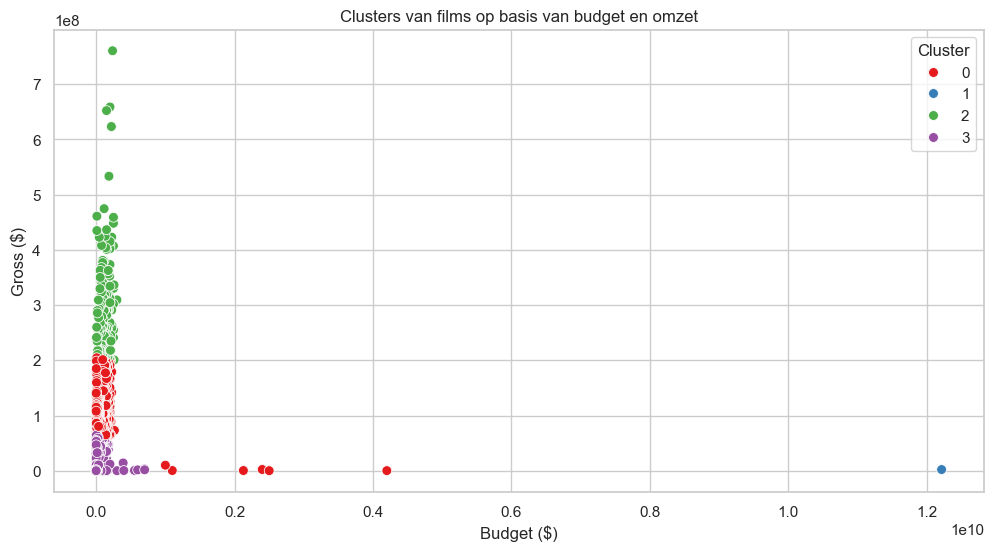

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_28224\1623956982.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='imdb_score', data=df_fin, palette='Set2')


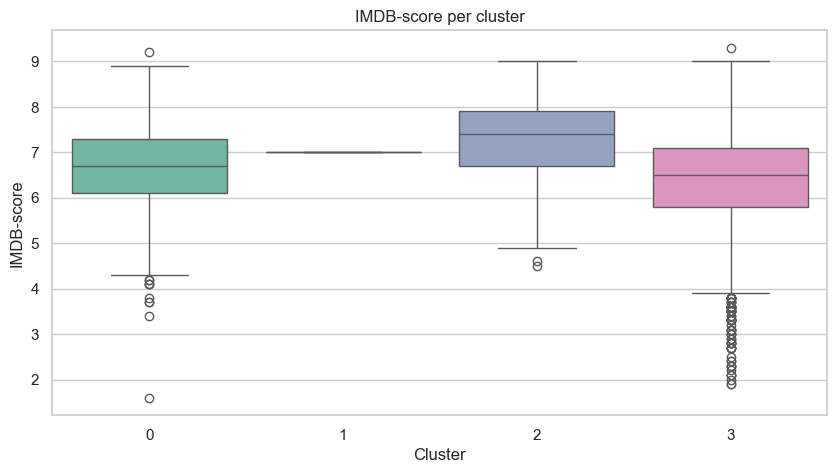

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_28224\1623956982.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='cast_total_facebook_likes', data=df_fin, palette='Set3')


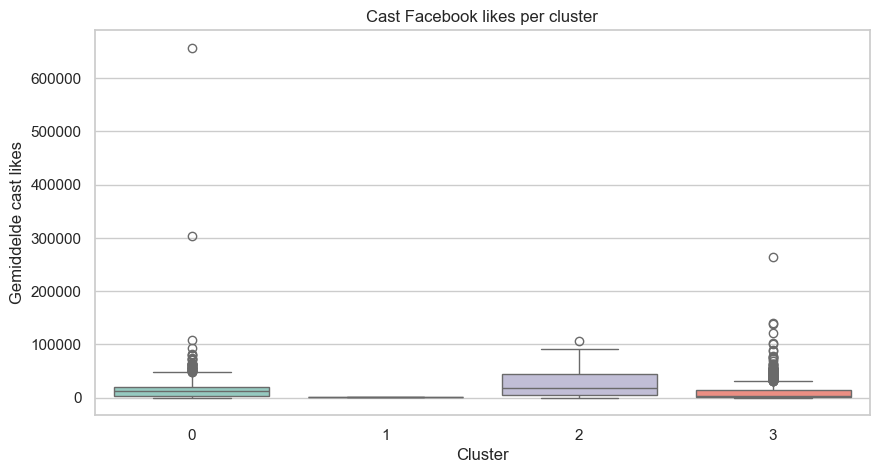

In [38]:
# Scatterplot van budget vs gross per cluster
plt.figure(figsize=(12,6))
sns.scatterplot(x='budget', y='gross', hue='cluster', data=df_fin, palette='Set1', s=50)
plt.xlabel("Budget ($)")
plt.ylabel("Gross ($)")
plt.title("Clusters van films op basis van budget en omzet")
plt.legend(title='Cluster')
plt.show()

# Boxplots van IMDB-score per cluster
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster', y='imdb_score', data=df_fin, palette='Set2')
plt.title("IMDB-score per cluster")
plt.xlabel("Cluster")
plt.ylabel("IMDB-score")
plt.show()

# Boxplots van cast_total_facebook_likes per cluster
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster', y='cast_total_facebook_likes', data=df_fin, palette='Set3')
plt.title("Cast Facebook likes per cluster")
plt.xlabel("Cluster")
plt.ylabel("Gemiddelde cast likes")
plt.show()

In [39]:
cluster_info = df_fin.groupby('cluster').agg(
    aantal_films=('movie_title','count'),
    gemiddeld_budget=('budget','mean'),
    gemiddeld_gross=('gross','mean'),
    gemiddeld_imdb=('imdb_score','mean'),
    gemiddeld_cast_likes=('cast_total_facebook_likes','mean')
).sort_values('gemiddeld_budget', ascending=False)

print("Kenmerken per cluster:\n")
print(cluster_info)

# Voorbeeldfilms per cluster
for i in range(4):
    print(f"\nVoorbeelden films in cluster {i}:")
    display(df_fin[df_fin['cluster']==i][['movie_title','budget','gross','imdb_score','country','director_name']].head(5))


Kenmerken per cluster:

         aantal_films  gemiddeld_budget  gemiddeld_gross  gemiddeld_imdb  gemiddeld_cast_likes
cluster                                                                                       
1                   1      1.221550e+10     2.201412e+06        7.000000           1173.000000
2                 159      1.350428e+08     2.995095e+08        7.333962          26350.207547
0                 823      8.337298e+07     1.097673e+08        6.656136          16134.731470
3                2898      2.533700e+07     2.090787e+07        6.358489           9089.327467

Voorbeelden films in cluster 0:


,movie_title,budget,gross,imdb_score,country,director_name
2,Spectre,245000000.0,200074175.0,6.8,UK,Sam Mendes
4,John Carter,263700000.0,73058679.0,6.6,USA,Andrew Stanton
10,Superman Returns,209000000.0,200069408.0,6.1,USA,Bryan Singer
11,Quantum of Solace,200000000.0,168368427.0,6.7,UK,Marc Forster
13,The Lone Ranger,215000000.0,89289910.0,6.5,USA,Gore Verbinski



Voorbeelden films in cluster 1:


,movie_title,budget,gross,imdb_score,country,director_name
2699,The Host,1.221550e+10,2201412.0,7.0,South Korea,Joon-ho Bong



Voorbeelden films in cluster 2:


,movie_title,budget,gross,imdb_score,country,director_name
0,Avatar,237000000.0,760505847.0,7.9,USA,James Cameron
1,Pirates of the Caribbean: At World's End,300000000.0,309404152.0,7.1,USA,Gore Verbinski
3,The Dark Knight Rises,250000000.0,448130642.0,8.5,USA,Christopher Nolan
5,Spider-Man 3,258000000.0,336530303.0,6.2,USA,Sam Raimi
6,Tangled,260000000.0,200807262.0,7.8,USA,Nathan Greno



Voorbeelden films in cluster 3:


,movie_title,budget,gross,imdb_score,country,director_name
60,Jupiter Ascending,176000000.0,47375327.0,5.4,USA,Lana Wachowski
82,47 Ronin,175000000.0,38297305.0,6.3,USA,Carl Rinsch
88,The Polar Express,165000000.0,665426.0,6.6,USA,Robert Zemeckis
104,Warcraft,160000000.0,46978995.0,7.3,USA,Duncan Jones
109,Alexander,155000000.0,34293771.0,5.5,Germany,Oliver Stone


Interpretatie clusters:
- Cluster met hoog budget en hoge omzet → Blockbusters
- Cluster met hoog budget en lage omzet → Flops
- Cluster met laag budget en hoge omzet → Cultfilms
- Cluster met laag budget en lage omzet → Low-budget / kleine films

Je kunt per cluster ook zien welke regisseurs en landen vaker voorkomen,
en hoe de IMDB-score en populariteit van de cast verschilt.
Deze analyse laat zien dat budget en omzet sterke indicaties geven voor succes,
maar er zijn uitzonderingen (films met laag budget en hoge omzet).
